<a href="https://colab.research.google.com/github/MuhammadFarrasThohari/Desain-dan-Analisis-Algoritma/blob/master/Latihan_Pertemuan6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
nterms = int(input("How many terms "))
n1, n2 = 0, 1
count = 0

if nterms <= 0:
  print("Please enter a positive integer ")
elif nterms == 1:
  print("Fibonacci sequence upto", nterms, ": ")
  print(n1)

else:
  print("Fibonacci sequence: ")
  while count < nterms:
    print(n1)
    nth = n1 + n2
    n1 = n2
    n2 = nth
    count += 1

How many terms 20
Fibonacci sequence: 
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [ ]:
def recur_fibo(n):
  if n <= 1:
    return n
  else:
    return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = 20

if nterms <= 0:
  print("Please print positive integer")
else:
  print("Fibonacci sequence: ")
  for i in range(nterms):
    print(recur_fibo(i))

Fibonacci sequence: 
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [ ]:
def exact_TSP(cities):
  return shortest(alltours(cities))

def shortest(tours):
  return min(tours, key=total_distance)


In [ ]:
alltours = itertools.permutations

cities = {1,2,3}

list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [ ]:
def total_distance(tour):
  return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

In [ ]:
City = complex

def distance(A, B):
  return abs(A-B)

In [ ]:
A = City(300, 0)
B = City(0, 400)

distance(A, B)

500.0

In [ ]:
def Cities(n):
  return set(City(random.randrange(10, 890), random.randrange(10, 590)) for c in range(n))

random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)
cities8

{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [ ]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j))
1990.388372313552


In [ ]:
def alltours(cities):
  start = first(cities)
  return[[start] + list(tour)
          for tour in itertools.permutations(cities - {start})]

def first(collection):
  for x in collection: return x

In [ ]:
alltours({1,2,3})

[[1, 2, 3], [1, 3, 2]]

In [ ]:
alltours({1,2,3,4})

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2]]

In [ ]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


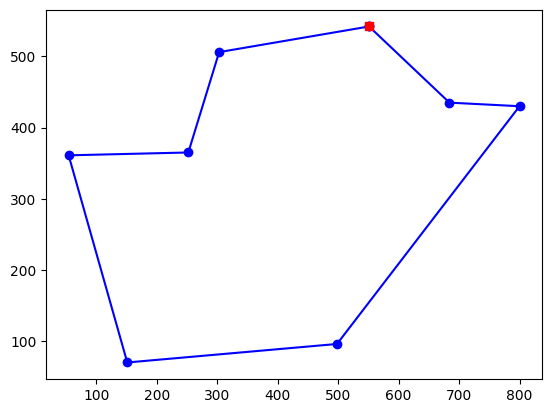

8 citiy tour; total distance = 1990.4, time = 0.013 secs forexact_TSP


In [ ]:
import time
def plot_tour(algorithm, cities):
  t0 = time.time()
  tour = algorithm(cities)
  t1 = time.time()
  plotline(list(tour) + [tour[0]])
  plotline([tour[0]], 'rs')
  plt.show()
  print("{} citiy tour; total distance = {:.1f}, time = {:.3f} secs for{}".format(len (tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style='bo-'):
  X, Y = XY(points)
  plt.plot(X, Y, style)

def XY(points):
  return[p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

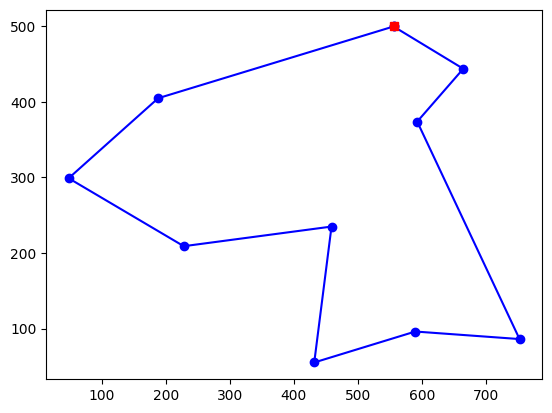

10 citiy tour; total distance = 2050.3, time = 1.783 secs forexact_TSP


In [ ]:
plot_tour(exact_TSP, cities10)

In [ ]:
# plot_tour(exact_TSP, cities100)

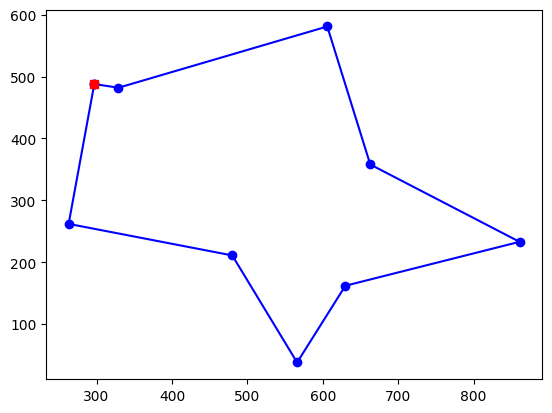

9 citiy tour; total distance = 1816.9, time = 0.256 secs forexact_TSP


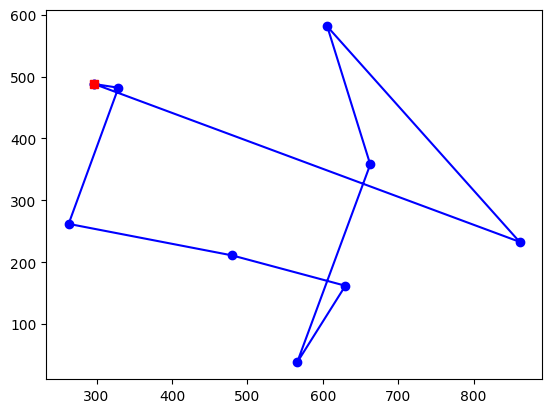

9 citiy tour; total distance = 2397.4, time = 0.000 secs forgreedy_TSP


In [ ]:
def greedy_TSP(cities):
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  return min(cities, key=lambda x: distance(x,A))

cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

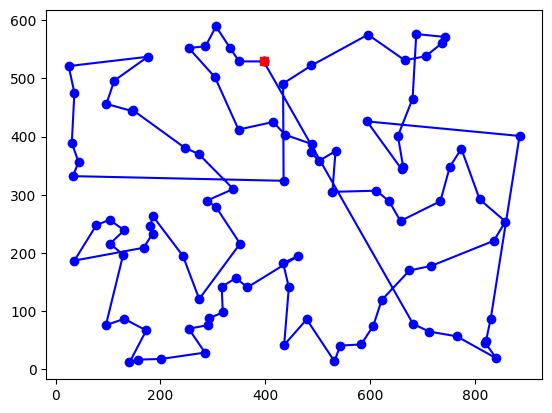

100 citiy tour; total distance = 6987.7, time = 0.001 secs forgreedy_TSP


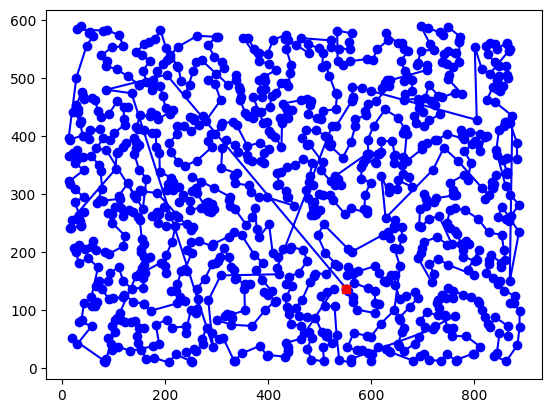

1000 citiy tour; total distance = 20529.4, time = 0.086 secs forgreedy_TSP


In [ ]:
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

In [ ]:
def greedy_TSP(cities):
    """At each step, visit the nearest neighbor that is still unvisited."""

    start = first(cities)
    tour = [start]

    unvisited_cities = unvisited(cities)

    while unvisited_cities:
        C = nearest_neighbor(tour[-1], unvisited_cities)
        tour.append(C)
        unvisited_cities.remove(C)

    return tour

def nearest_neighbor(A, cities):
    """Find the city in cities that is nearest to city A."""
    return min(cities, key=lambda x: distance(x, A))


In [ ]:
def all_greedy_TSP(cities):
    """Try the greedy algorithm from each of the starting cities; return the shortest tour."""
    return shortest(greedy_TSP(cities, start=c) for c in cities)

def greedy_TSP(cities, start=None):
    """At each step, visit the nearest neighbor that is still unvisited."""

    if start is None:
        start = first(cities)

    tour = [start]
    unvisited_cities = cities - {start}

    while unvisited_cities:
        C = nearest_neighbor(tour[-1], unvisited_cities)
        tour.append(C)
        unvisited_cities.remove(C)

    return tour

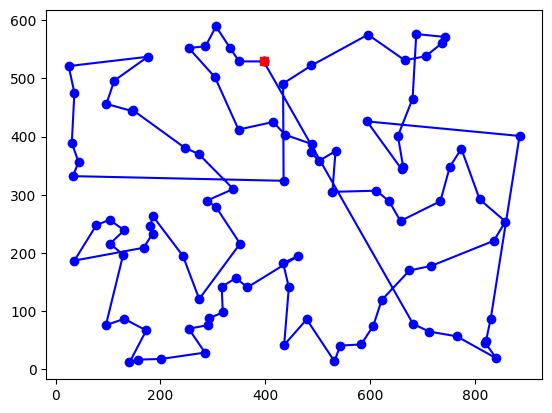

100 citiy tour; total distance = 6987.7, time = 0.001 secs forgreedy_TSP


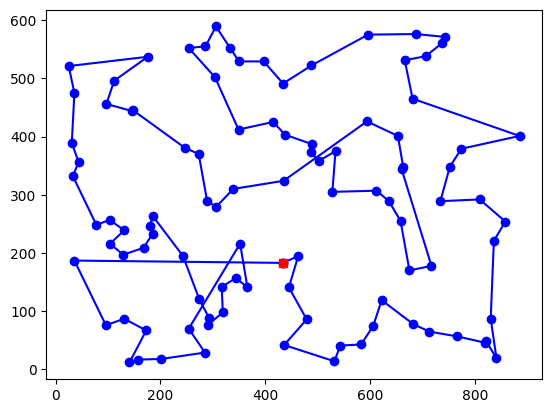

100 citiy tour; total distance = 6213.5, time = 0.088 secs forall_greedy_TSP


In [ ]:
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

In [ ]:
import itertools

def greedy_exact_end_TSP(cities, start=None, end_size=8):
    """
    At each step, visit the nearest neighbor that is still unvisited until there are k_end cities left;
    then choose the best of all possible endings.
    """

    if start is None:
        start = first(cities)
    tour = [start]

    unvisited_cities = cities - {start}

    # Use greedy algorithm for all but the last end_size cities
    while len(unvisited_cities) > end_size:
        C = nearest_neighbor(tour[-1], unvisited_cities)
        tour.append(C)
        unvisited_cities.remove(C)

    # Consider all permutations of possible ends to the tour, and choose the best one
    ends = map(list, itertools.permutations(unvisited_cities))

    best = shortest([tour[0], tour[-1]] + end for end in ends)

    return tour + best[2:]


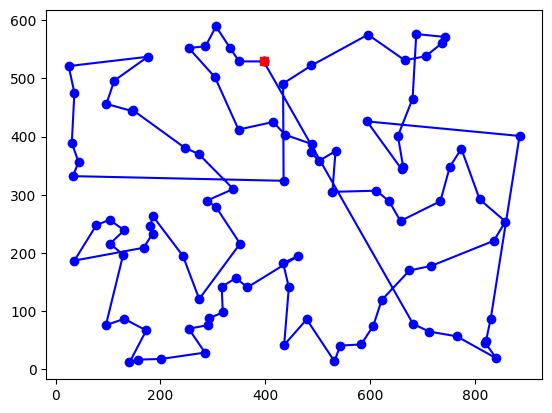

100 citiy tour; total distance = 6987.7, time = 0.095 secs forgreedy_exact_end_TSP


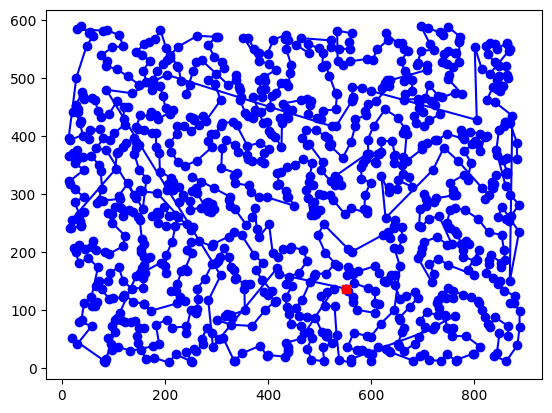

1000 citiy tour; total distance = 20171.0, time = 0.172 secs forgreedy_exact_end_TSP


In [ ]:
plot_tour(greedy_exact_end_TSP, cities100)
plot_tour(greedy_exact_end_TSP, cities1000)

In [ ]:
import random

def greedy_bi_TSP(cities, start_size=12, end_size=6):
    """
    At each step, visit the nearest neighbor that is still unvisited.
    """

    starts = random.sample(cities, min(len(cities), start_size))

    return shortest(greedy_exact_end_TSP(cities, start, end_size) for start in starts)


<ipython-input-37-c92e09314f2d>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


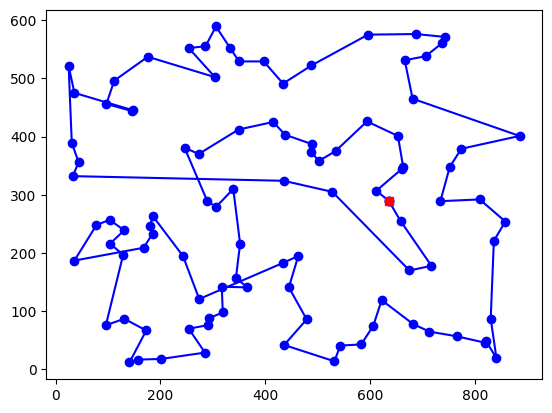

100 citiy tour; total distance = 6230.0, time = 0.055 secs forgreedy_bi_TSP


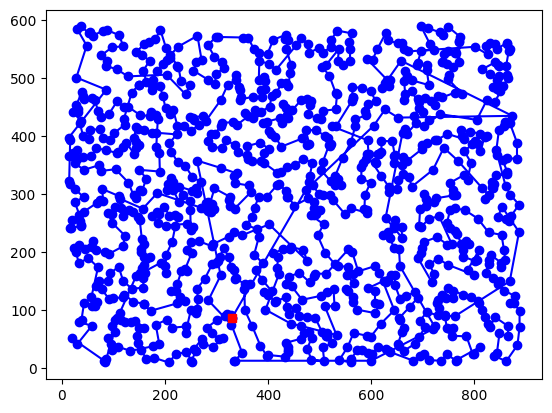

1000 citiy tour; total distance = 20070.7, time = 0.958 secs forgreedy_bi_TSP


In [ ]:
random.seed('bi')
plot_tour(greedy_bi_TSP, cities100)
plot_tour(greedy_bi_TSP, cities1000)

In [ ]:
def compare_algorithms(algorithms, maps):
    """
    Apply each algorithm to each map and plot results.
    """
    for algorithm in algorithms:
        ti = time.time()
        results = [total_distance(algorithm(m)) for m in maps]
        te = time.time()
        avg = sum(results) / len(results)
        print('{:.0f} x {:.1f}s: {}'.format(avg, te - ti, algorithm.__name__))
        plt.plot(sorted(results), label=algorithm.__name__)

    plt.legend(loc=2)
    plt.show()
    print('{} x {}-city maps'.format(len(maps), len(maps[0])))

def Maps(M, N):
    """
    Return a list of M maps, each consisting of a set of N cities.
    """
    return [Cities(N) for m in range(M)]

5080 x 0.0s: greedy_TSP
4924 x 9.9s: greedy_exact_end_TSP
4531 x 1.1s: all_greedy_TSP


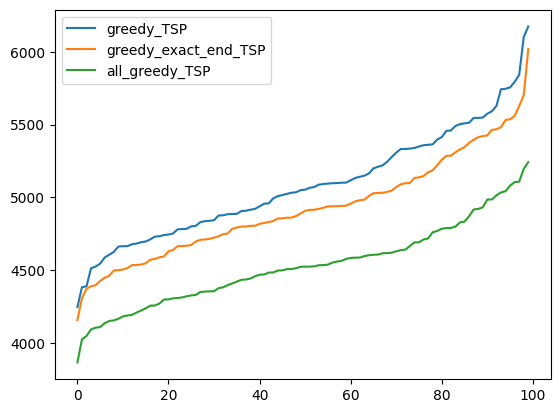

100 x 50-city maps


In [ ]:
compare_algorithms([greedy_TSP, greedy_exact_end_TSP, all_greedy_TSP], Maps(100,50))

In [ ]:
def bi_10_6(cities):
    return greedy_bi_TSP(cities, 10, 6)

def bi_20_5(cities):
    return greedy_bi_TSP(cities, 20, 5)

def bi_40_4(cities):
    return greedy_bi_TSP(cities, 40, 4)

def bi_80_2(cities):
    return greedy_bi_TSP(cities, 80, 2)

def bi_160_1(cities):
    return greedy_bi_TSP(cities, 160, 1)

algorithms = [bi_10_6, bi_20_5, bi_40_4, bi_80_2, bi_160_1]

<ipython-input-37-c92e09314f2d>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


4577 x 1.6s: bi_10_6
4539 x 0.9s: bi_20_5
4537 x 1.1s: bi_40_4
4555 x 1.2s: bi_80_2
4565 x 1.1s: bi_160_1


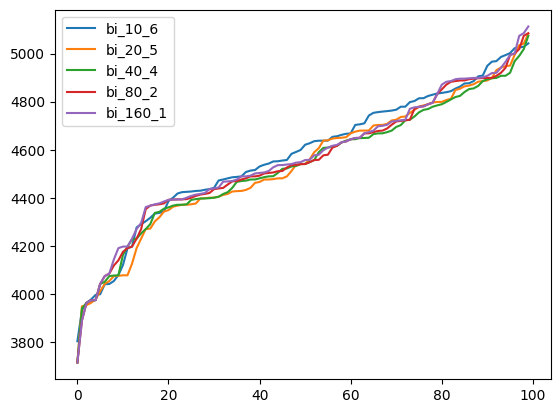

100 x 50-city maps


In [ ]:
compare_algorithms(algorithms, Maps(100,50))

<ipython-input-37-c92e09314f2d>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


6506 x 1.7s: bi_10_6
6478 x 1.1s: bi_20_5
6430 x 2.6s: bi_40_4
6410 x 3.3s: bi_80_2
6403 x 4.2s: bi_160_1


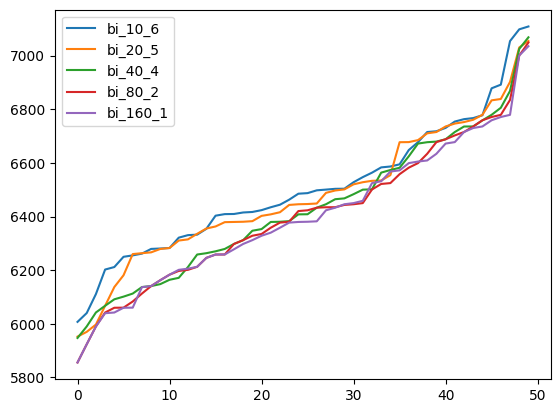

50 x 100-city maps


In [ ]:
compare_algorithms(algorithms, Maps(50,100))

<ipython-input-37-c92e09314f2d>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min(len(cities), start_size))


8099 x 0.9s: bi_10_6
8084 x 1.2s: bi_20_5
8044 x 2.1s: bi_40_4
8020 x 4.9s: bi_80_2
7983 x 9.1s: bi_160_1


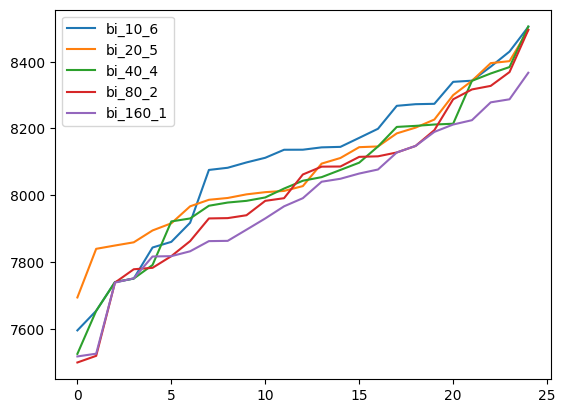

25 x 160-city maps


In [ ]:
compare_algorithms(algorithms, Maps(25,160))